In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
pd.options.display.max_rows = 999
pd.options.display.max_columns = 30

#dataframes
ls = pd.read_csv('listings.csv')
# nb = pd.read_csv('neighbourhoods.csv')
# rv = pd.read_csv('reviews.csv')
# cl = pd.read_csv('calendar.csv')

In [2]:
#rename column id to listing_id
ls = ls.rename(columns={'id':'listing_id'})

In [3]:
#drop empty columns
ls.drop('neighbourhood_group', axis = 1, inplace = True)

In [4]:
#check if both worked
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7889 entries, 0 to 7888
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      7889 non-null   int64  
 1   name                            7889 non-null   object 
 2   host_id                         7889 non-null   int64  
 3   host_name                       7889 non-null   object 
 4   neighbourhood                   7889 non-null   object 
 5   latitude                        7889 non-null   float64
 6   longitude                       7889 non-null   float64
 7   room_type                       7889 non-null   object 
 8   price                           7889 non-null   int64  
 9   minimum_nights                  7889 non-null   int64  
 10  number_of_reviews               7889 non-null   int64  
 11  last_review                     6655 non-null   object 
 12  reviews_per_month               66

In [5]:
#avg pricing by room types?
mean_roomtype = ls.groupby('room_type')
mean_roomtype = mean_roomtype.mean()
mean_roomtype = mean_roomtype.sort_values('price', ascending = False)
mean_roomtype['price']

room_type
Hotel room         261.306667
Entire home/apt    194.034760
Private room       113.255211
Shared room         44.991071
Name: price, dtype: float64

In [6]:
#Who is the most popular host?
group_host = ls.groupby(['host_id','host_name'])
group_host = group_host['calculated_host_listings_count'].count()
group_host = group_host.sort_values(ascending = False)
group_host.head(10)

host_id    host_name         
107434423  Blueground            220
12243051   Sonder                 98
55976787   Natalia                80
3965428    Rob                    76
8534462    Corp Condos & Apts     62
88566861   Kasa                   61
47172572   Zencity                61
99375151   Marina                 45
229095817  Loftium                45
9094538    Nicole                 39
Name: calculated_host_listings_count, dtype: int64

In [7]:
#what kind of properties do these top 10 hosts have?


host_room = ls.groupby(['host_id','host_name','room_type'])
host_room = host_room['calculated_host_listings_count'].count()
host_room = host_room.sort_values(ascending = False)
host_room

#how do I sort by the host_name?
#  df.sort_values(by=['col1'])

host_id    host_name           room_type      
107434423  Blueground          Entire home/apt    220
12243051   Sonder              Entire home/apt     92
55976787   Natalia             Private room        80
3965428    Rob                 Entire home/apt     75
8534462    Corp Condos & Apts  Entire home/apt     62
                                                 ... 
91366430   Lacey               Entire home/apt      1
91194876   Steven              Entire home/apt      1
91175420   Rachel              Entire home/apt      1
90924431   Magdalena           Entire home/apt      1
2140       Lois                Entire home/apt      1
Name: calculated_host_listings_count, Length: 4522, dtype: int64

In [8]:
#which neighborhoods are the top ten located in?
hostname = ls.groupby('neighbourhood')['host_name'].value_counts()
hostname = hostname.sort_values(ascending = False)
hostname.head(10)

neighbourhood    host_name         
Loop             Blueground            86
Near West Side   Natalia               73
Near North Side  Blueground            71
                 Corp Condos & Apts    62
Near West Side   Blueground            46
                 Marina                42
Near North Side  Rob                   35
Loop             Kasa                  33
Lake View        Nicole                29
Near North Side  Kasa                  28
Name: host_name, dtype: int64

In [9]:
#minimum nights and price
minprice = ls.groupby(['host_name','minimum_nights'])
minprice = minprice['minimum_nights'].count()
minprice = minprice.sort_values(ascending = False)
minprice

host_name           minimum_nights
Blueground          30                220
Natalia             1                  80
Sonder              4                  73
Corp Condos & Apts  2                  62
Zencity             1                  54
                                     ... 
Luke & Ligia        16                  1
Luke                4                   1
                    1                   1
Lukas               2                   1
K                   14                  1
Name: minimum_nights, Length: 3358, dtype: int64

In [10]:
ls.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [11]:
#what is the average price by neighborhood?
mean_n = ls.groupby('neighbourhood')
mean_n = mean_n['price'].mean()
mean_n = mean_n.sort_values(ascending = False)
mean_n

neighbourhood
Near North Side           346.170012
Near South Side           253.225989
Lake View                 220.555046
North Center              199.320988
Lincoln Park              199.029412
West Town                 188.912184
Loop                      181.934240
West Englewood            170.000000
Oakland                   163.166667
Archer Heights            158.285714
Uptown                    157.201878
Logan Square              144.754826
Armour Square             142.786517
Near West Side            141.106838
Albany Park               133.038462
Avondale                  125.096591
Austin                    121.317460
Mckinley Park             119.970588
Portage Park              119.181818
Greater Grand Crossing    117.444444
Douglas                   117.342105
Edgewater                 115.962441
Lincoln Square            115.247423
Grand Boulevard           112.705882
Edison Park               112.000000
Kenwood                   106.909091
Washington Park         

In [12]:
#what is the average price by room_type?
avgprice = ls.groupby('room_type')
avgprice = avgprice['price'].mean()
avgprice = avgprice.sort_values(ascending = False)
avgprice

room_type
Hotel room         261.306667
Entire home/apt    194.034760
Private room       113.255211
Shared room         44.991071
Name: price, dtype: float64

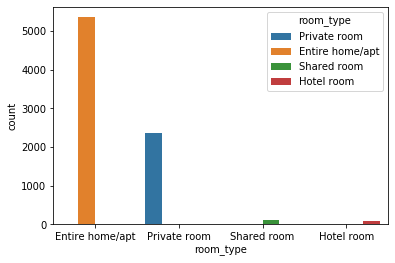

In [13]:
#Which room type is most popular overall?
sns.countplot(x=ls['room_type'], hue=ls['room_type'], order = ls['room_type'].value_counts().index)

In [14]:
ls.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [19]:
#lets look at lincoln park
lp = ls.loc[ls['neighbourhood'] == "Lincoln Park"]
lp

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91769,-87.63788,Entire home/apt,150,4,49,2019-10-23,0.66,10,315
5,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91183,-87.64000,Entire home/apt,215,4,17,2020-03-14,0.23,10,314
6,12140,Lincoln Park Guest House,46734,Sharon And Robert,Lincoln Park,41.92335,-87.64951,Private room,289,2,4,2018-10-17,0.07,1,171
7,24833,Private Apt 1 Block to Fullerton L Red Line - ...,101521,Red,Lincoln Park,41.92679,-87.65521,Entire home/apt,99,32,37,2018-07-29,0.30,4,90
8,25879,Top 2/1 Block to Fullerton L Red Line Deck & ...,101521,Red,Lincoln Park,41.92693,-87.65753,Entire home/apt,99,32,46,2020-03-02,0.38,4,296
11,44020,2 Bed MCM 1 Block to Fullerton Red line L & Ga...,101521,Red,Lincoln Park,41.92673,-87.65731,Entire home/apt,80,32,52,2019-09-01,0.49,4,270
18,145690,4BR/2BR Walk to North Ave Beach & Zoo~Close to El,683529,Joe,Lincoln Park,41.91289,-87.63864,Entire home/apt,475,2,44,2020-02-23,0.73,20,353
62,533831,Perfect Lincoln Park home in a great location!,483146,Sasha,Lincoln Park,41.91269,-87.64250,Entire home/apt,280,2,55,2019-10-15,0.57,2,152
80,699284,Your Sweet Chicago Home,3586103,Judy,Lincoln Park,41.92929,-87.64895,Entire home/apt,800,3,44,2019-05-01,0.47,1,363
99,863120,Cozy Private Room in a unique Chicago Penthouse,4525503,Nejla Yatkin And Enki,Lincoln Park,41.92170,-87.65959,Private room,85,2,98,2020-03-29,1.18,2,225


In [22]:
#how many rows does lp have?
lp.shape

(374, 15)

In [21]:
# #what is the average price by room_type?
# avgprice = ls.groupby('room_type')
# avgprice = avgprice['price'].mean()
# avgprice = avgprice.sort_values(ascending = False)
# avgprice

#room type counts
lprooms = lp.groupby('room_type')
lprooms = lprooms['price'].mean()
lprooms

room_type
Entire home/apt    220.832797
Private room        94.423729
Shared room         46.750000
Name: price, dtype: float64